<div style="text-align: center;">
  <h2>Prepared by: Alexis Jaenna B. Argosino & Luis Liam T. Malana | BSIT 3B</h2>
  <h4>ITD – Data Mining</h4>
</div>
<hr>


# Understanding Filipino Household Spending Behavior

##  Introduction
This study explores the patterns of income and expenditure among Filipino households using the "Family Income and Expenditure" dataset. By analyzing these patterns, we aim to uncover insights into how income levels influence spending behaviors, especially on essentials like food, education, and housing—and how various socio-economic factors shape these trends.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
family = pd.read_csv("Family Income and Expenditure.csv")
family

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


# #Does Money Influence What You Eat?
We begin by exploring the connection between household income and food expenditure. The scatter plot reveals a positive correlation—higher income generally leads to higher food spending. Yet, outliers suggest that even lower-income households may allocate large amounts toward food, perhaps due to larger family sizes or regional differences.

<h1> Question.1: </h1>
<h4> Is there a relationship between household income and food expenditure? </h4>

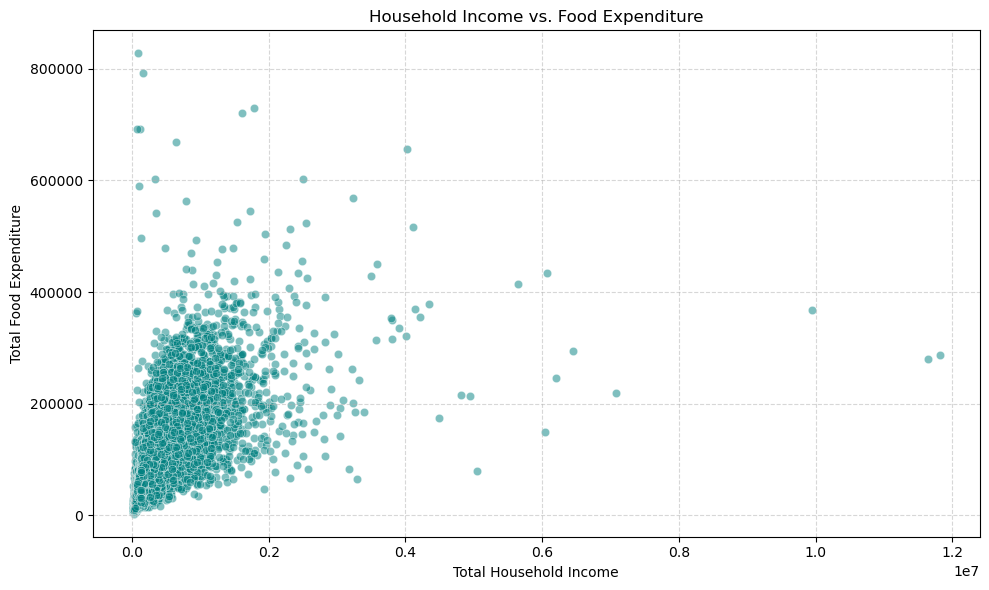

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Household Income",
    y="Total Food Expenditure",
    data=family,
    alpha=0.5,
    color="teal"
)
plt.title("Household Income vs. Food Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Total Food Expenditure")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.1: </h1>
<h4> A positive trend is observed households with higher income generally tend to spend more on food. However, there's a wide spread, suggesting that some lower-income households still spend substantially on food, likely due to household size. </h4>
<hr>

# #Regional Income Gaps — Where You Live Matters
In this part, we explore how household income varies across regions in the Philippines. Geography plays a key role in economic opportunity, and this comparison helps us understand the broader financial landscape across the country.

<h1> Question.2: </h1>
<h4> How does the average household income vary across different regions in the Philippines? </h4>

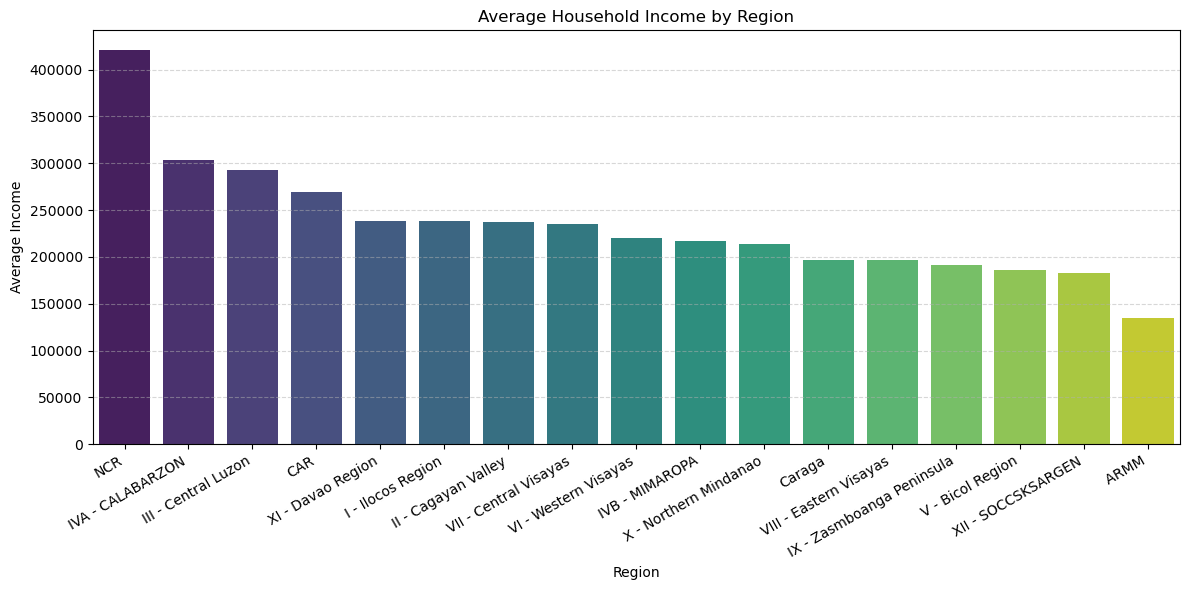

In [4]:
income_by_region = family.groupby("Region")["Total Household Income"].mean().reset_index()
income_by_region = income_by_region.sort_values("Total Household Income", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Total Household Income",
    data=income_by_region,
    palette="viridis"
)
plt.title("Average Household Income by Region")
plt.xlabel("Region")
plt.ylabel("Average Income")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.2: </h1>
<h4> Regions such as Metro Manila and CALABARZON report the highest average household incomes, while regions like ARMM and CARAGA show significantly lower averages. This disparity highlights regional economic imbalances in the Philippines. </h4>
<hr>

# #Health and Geography — A Look at Medical Spending
Healthcare is a critical part of household expenses, but spending on it can vary widely across regions. In this section, we explore how much families in different parts of the Philippines allocate to medical care. These patterns may reveal insights about access, affordability, and regional differences in healthcare needs.

<h1> Question.3: </h1>
<h4> What is the average medical care expenditure per region? </h4>

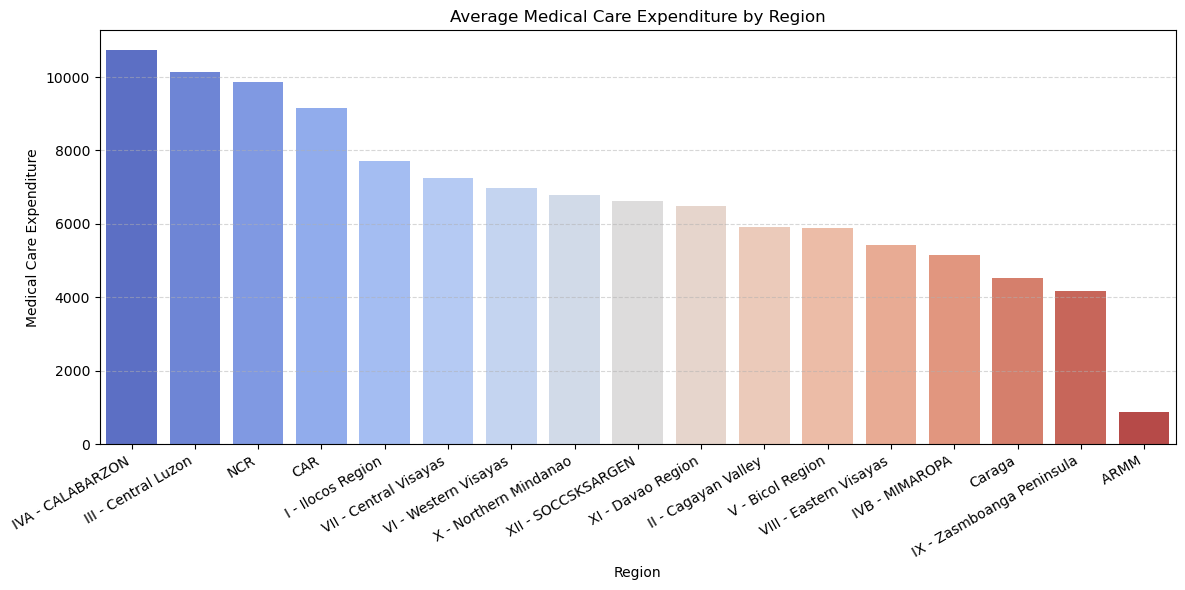

In [5]:
medical_care = family.groupby("Region")["Medical Care Expenditure"].mean().reset_index()
medical_care = medical_care.sort_values("Medical Care Expenditure", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Medical Care Expenditure",
    data=medical_care,
    palette="coolwarm"
)
plt.title("Average Medical Care Expenditure by Region")
plt.xlabel("Region")
plt.ylabel("Medical Care Expenditure")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.3: </h1>
<h4> Certain regions like NCR and Central Luzon spend more on healthcare, potentially reflecting better access to facilities or higher healthcare costs. Meanwhile, other areas spend less, possibly due to limited access rather than lower need. </h4>
<hr>

# #Regional Patterns in Rice Spending
Rice is a staple in every Filipino household, but spending on it isn't always the same across the country. This section examines how rice expenditure varies by region—highlighting how geography, consumption habits, and local access may influence food spending patterns.

<h1> Question.4: </h1>
<h4> How is rice expenditure distributed across regions? </h4>

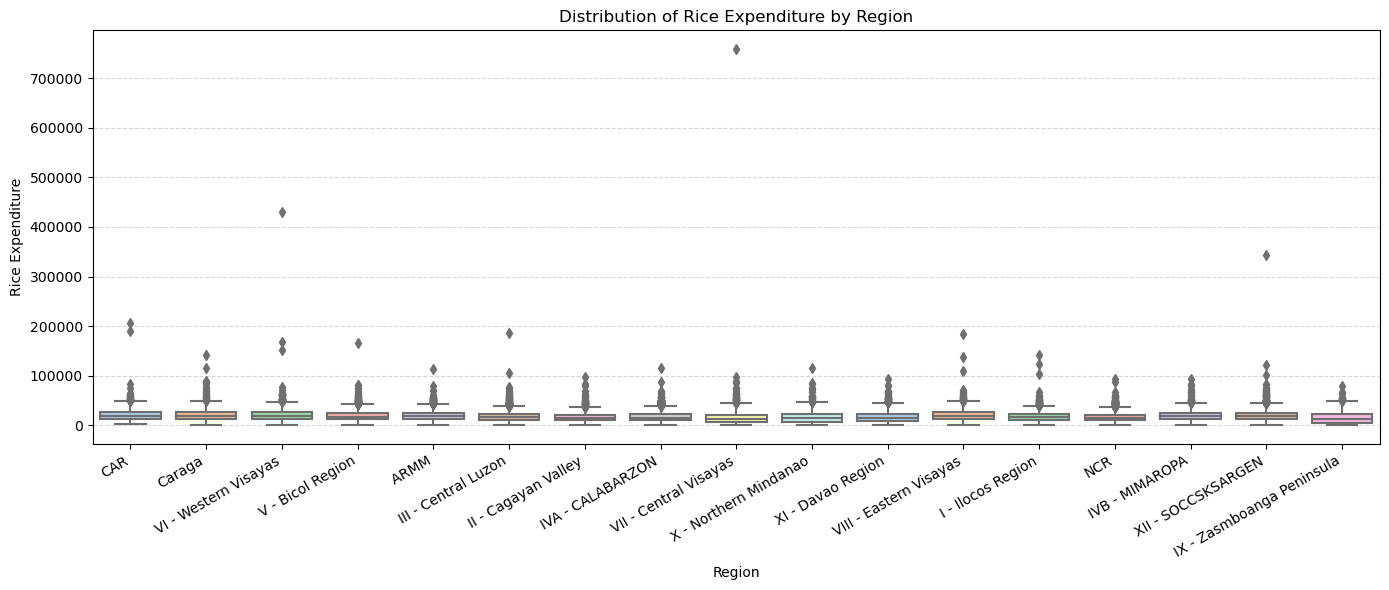

In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="Region",
    y="Total Rice Expenditure",
    data=family,
    palette="pastel"
)
plt.title("Distribution of Rice Expenditure by Region")
plt.xlabel("Region")
plt.ylabel("Rice Expenditure")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.4: </h1>
<h4> Regions like Bicol and Western Visayas exhibit wider variance in rice expenditure, possibly due to differences in household size or rice access. Some regions have consistent spending, indicating more uniform food behavior. </h4>
<hr>

# #How Big Is the Average Filipino Household?
Household size plays a major role in shaping expenses and lifestyle. In this section, we explore the typical number of people living under one roof. Understanding household composition helps provide context for how families allocate resources and manage daily life.

<h1> Question.5: </h1>
<h4> What is the typical household size in the dataset? </h4>

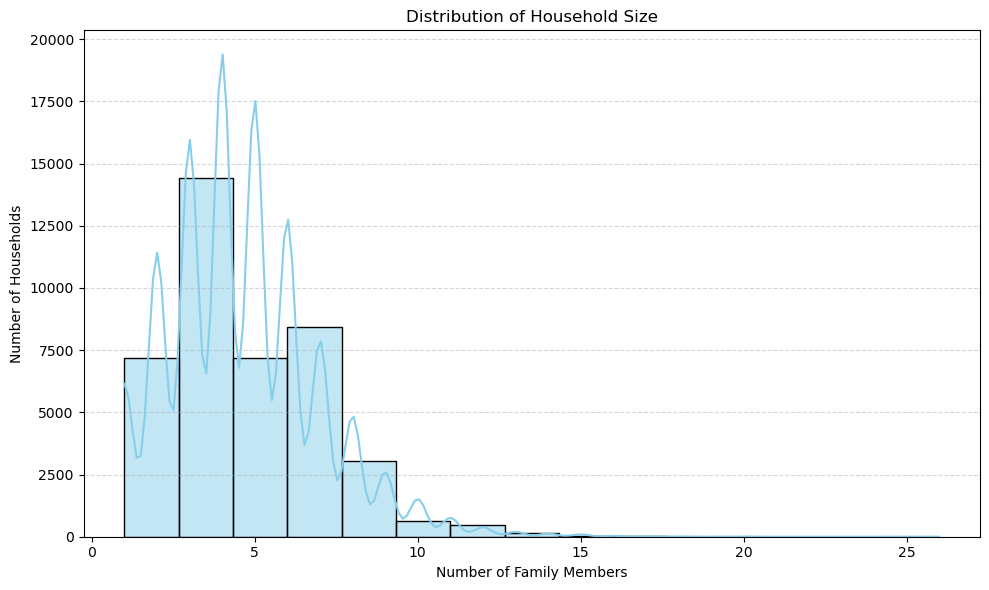

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(
    family["Total Number of Family members"],
    bins=15,
    kde=True,
    color="skyblue"
)
plt.title("Distribution of Household Size")
plt.xlabel("Number of Family Members")
plt.ylabel("Number of Households")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.5: </h1>
<h4> Most households consist of 3 to 6 members. Very small (1–2 members) and large (8+) households are rare. This suggests the average Filipino household typically includes parents and children under one roof. </h4>
<hr>

# #Where Does the Money Go?
To better understand household priorities, we take a closer look at how families distribute their spending across major categories. This breakdown gives us insight into which needs take up the largest portions of the budget and what that might reveal

<h1> Question.6: </h1>
<h4> What categories contribute the most to total household expenditures? </h4>

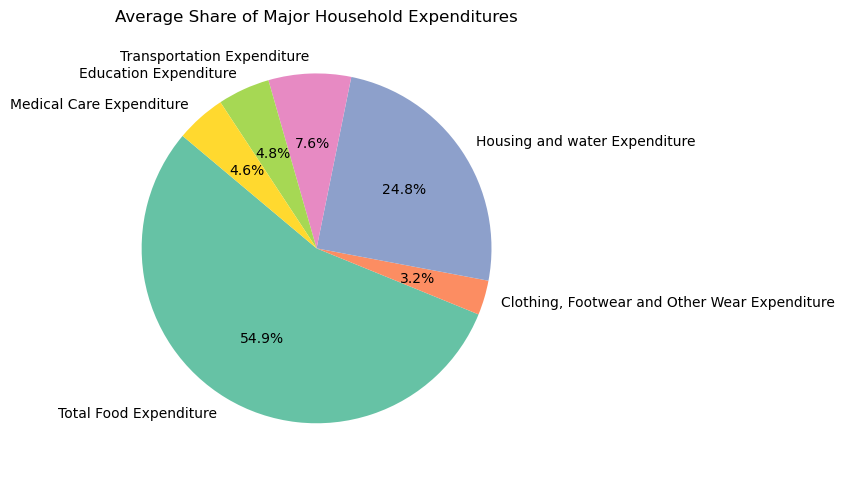

In [8]:
expenditures = family[[
    "Total Food Expenditure", 
    "Clothing, Footwear and Other Wear Expenditure", 
    "Housing and water Expenditure", 
    "Transportation Expenditure", 
    "Education Expenditure", 
    "Medical Care Expenditure"
]].mean().reset_index()

expenditures.columns = ["Expenditure Type", "Average Amount"]

plt.figure(figsize=(8, 8))
plt.pie(
    expenditures["Average Amount"],
    labels=expenditures["Expenditure Type"],
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
    startangle=140
)
plt.title("Average Share of Major Household Expenditures")
plt.tight_layout()
plt.show()

<h1> Insight No.6: </h1>
<h4> Food dominates household spending, followed by transportation and utilities. Education and clothing account for smaller slices, highlighting the centrality of food and mobility in Filipino family budgets. </h4>
<hr>

# # Does Family Size Affect Income?
Next, we explore whether bigger families bring in more money or if household income is independent of family size. Understanding this relationship helps shed light on the economic dynamics within Filipino households and how family composition influences earnings.

<h1> Question.7: </h1>
<h4>  Is there a correlation between number of family members and total household income? </h4>

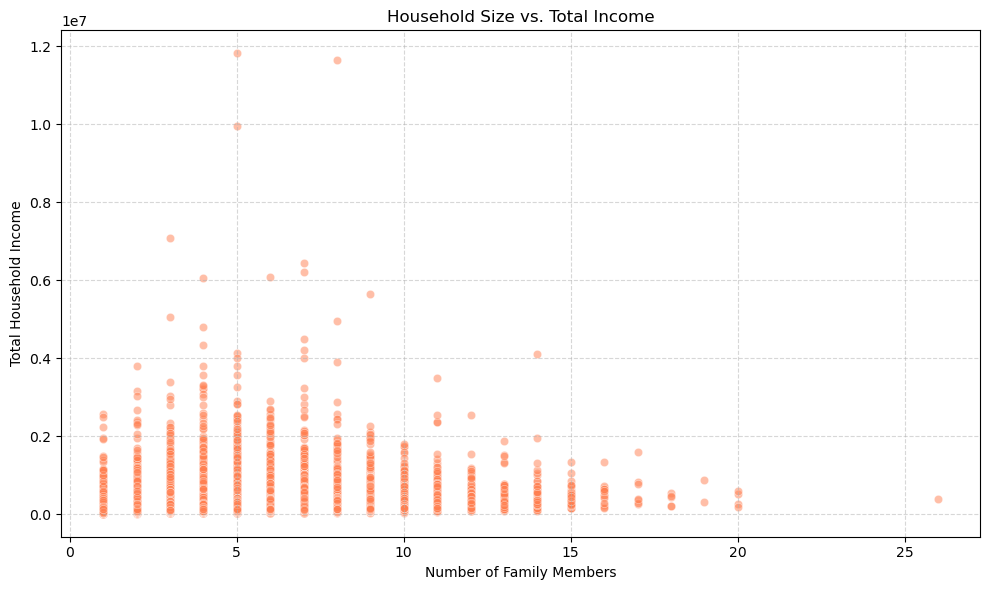

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Number of Family members",
    y="Total Household Income",
    data=family,
    alpha=0.5,
    color="coral"
)
plt.title("Household Size vs. Total Income")
plt.xlabel("Number of Family Members")
plt.ylabel("Total Household Income")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.7: </h1>
<h4>Larger households don’t necessarily correlate with higher income. There's a weak trend where medium-sized families (4–6 members) tend to have slightly higher incomes, possibly due to more working adults. </h4>
<hr>

# # Food Spending Across Income Levels
We examine how food expenses change as household income grows. Tracking this trend reveals not only how families prioritize nourishment at different earnings but also hints at the point where increased income no longer drives bigger food budgets.

<h1> Question.8: </h1>
<h4>  How does average food expenditure trend across income brackets? </h4>

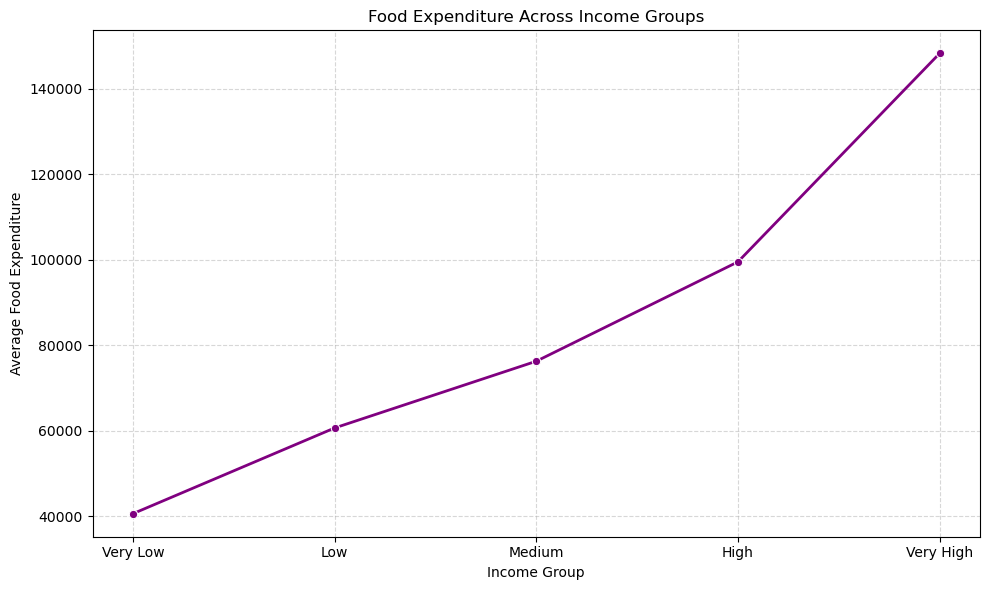

In [10]:
family["Income Group"] = pd.qcut(family["Total Household Income"], q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

food_by_income_group = family.groupby("Income Group")["Total Food Expenditure"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Income Group",
    y="Total Food Expenditure",
    data=food_by_income_group,
    marker="o",
    linewidth=2,
    color="purple"
)
plt.title("Food Expenditure Across Income Groups")
plt.xlabel("Income Group")
plt.ylabel("Average Food Expenditure")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.8: </h1>
<h4> Food expenditure rises steadily across income brackets. Wealthier households allocate more money to food, though the growth rate slows down at the highest income levels, suggesting a limit to food spending regardless of income. </h4>
<hr>

# #Clothing Expenses by Region
Clothing spending paints a varied picture across the Philippines. By comparing regions, we uncover differences in budget allocation that may reflect local economic conditions, cultural preferences, and lifestyle choices.

<h1> Question.9: </h1>
<h4> How is clothing expenditure distributed across regions? </h4>

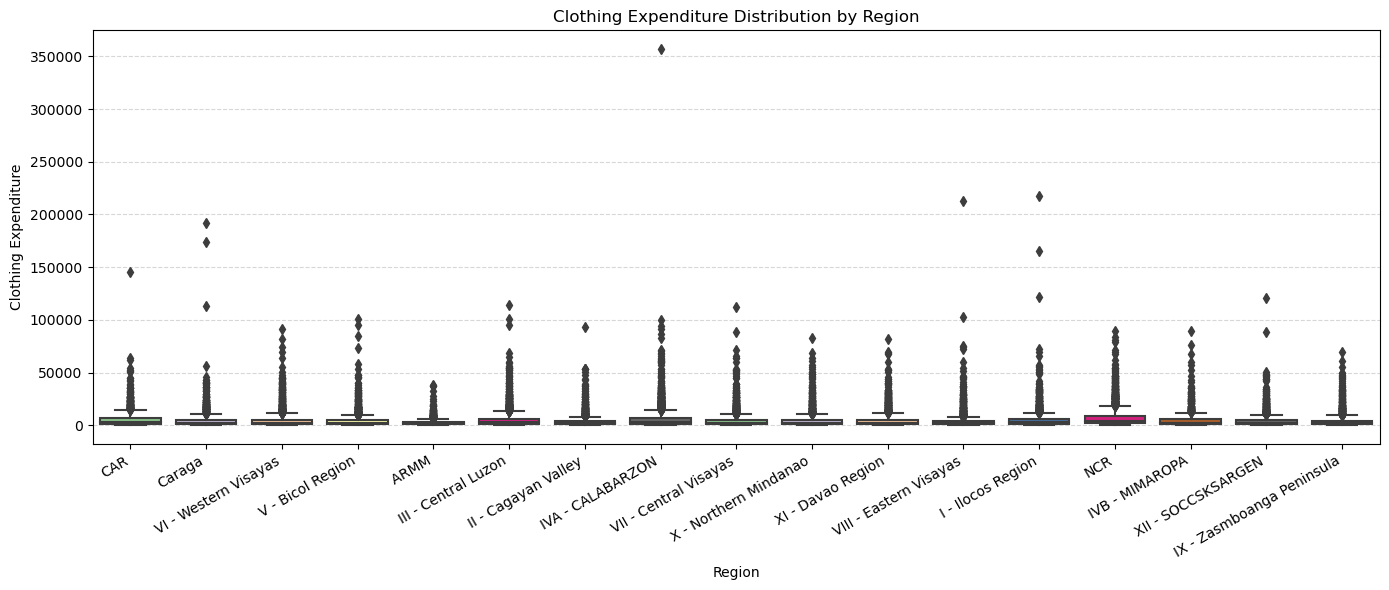

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="Region",
    y="Clothing, Footwear and Other Wear Expenditure",
    data=family,
    palette="Accent"
)
plt.title("Clothing Expenditure Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Clothing Expenditure")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.9: </h1>
<h4> Clothing expenses vary widely across regions. Metro Manila shows higher variability, while regions like ARMM and MIMAROPA have generally lower and more consistent spending patterns, possibly reflecting affordability or lifestyle factors. </h4>
<hr>

# #Which Regions Spend Most on Transportation?
Transportation costs reveal much about how geography and infrastructure shape daily life. By identifying the top spenders, we gain insight into commuting patterns and mobility challenges faced by families across the country.

<h1> Question.10: </h1>
<h4> What are the top regions in terms of transportation spending? </h4>

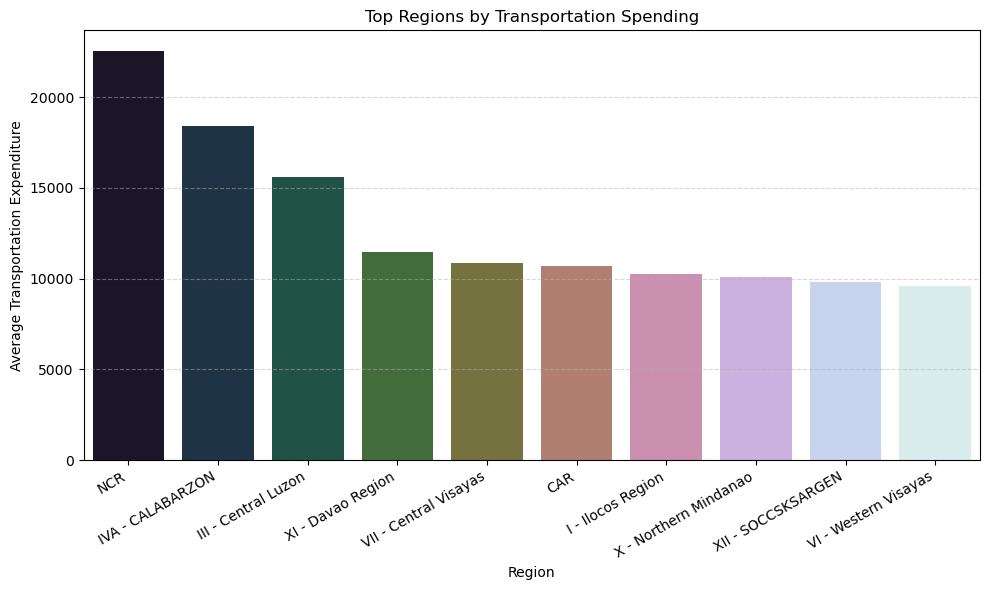

In [12]:
transport_exp = family.groupby("Region")["Transportation Expenditure"].mean().reset_index()
transport_exp = transport_exp.sort_values("Transportation Expenditure", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(
    x="Region",
    y="Transportation Expenditure",
    data=transport_exp.head(10),
    palette="cubehelix"
)
plt.title("Top Regions by Transportation Spending")
plt.xlabel("Region")
plt.ylabel("Average Transportation Expenditure")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.10: </h1>
<h4> Urbanized regions like NCR and CALABARZON spend the most on transport, likely due to longer commutes and reliance on paid transit options. Rural regions tend to spend less, possibly due to proximity of resources or limited infrastructure. </h4>
<hr>

# #Does Housing Spending Grow with Income?
We investigate how housing costs relate to household earnings. While higher income generally means bigger housing budgets, some lower-income families still face substantial housing expenses, reflecting challenges like rent burden or homeownership costs.

<h1> Question.11: </h1>
<h4>  Does housing expenditure increase with total household income? </h4>

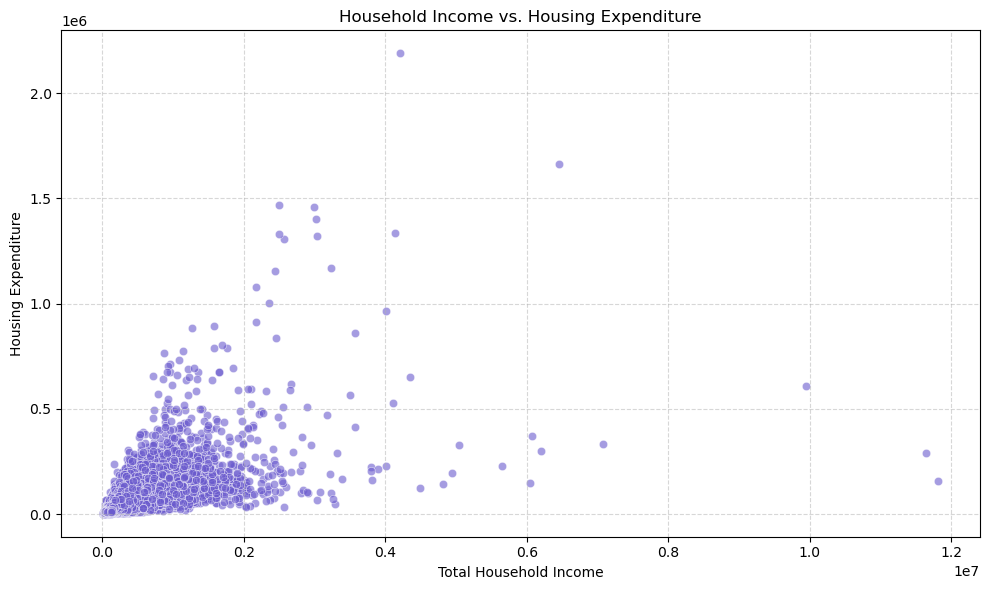

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Household Income",
    y="Housing and water Expenditure",
    data=family,
    color="slateblue",
    alpha=0.6
)
plt.title("Household Income vs. Housing Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Housing Expenditure")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.11: </h1>
<h4> A positive trend is visible — as income rises, housing expenditure tends to increase. However, some households with lower income also report significant housing costs, indicating rent burden or home ownership expenses. </h4>
<hr>

# #Education Spending Across Income Groups
We explore how investment in education shifts as household income changes. The data reveals that wealthier families dedicate substantially more to schooling, highlighting disparities in educational access and opportunities.

<h1> Question.12: </h1>
<h4>   How does education expenditure vary across different income groups? </h4>

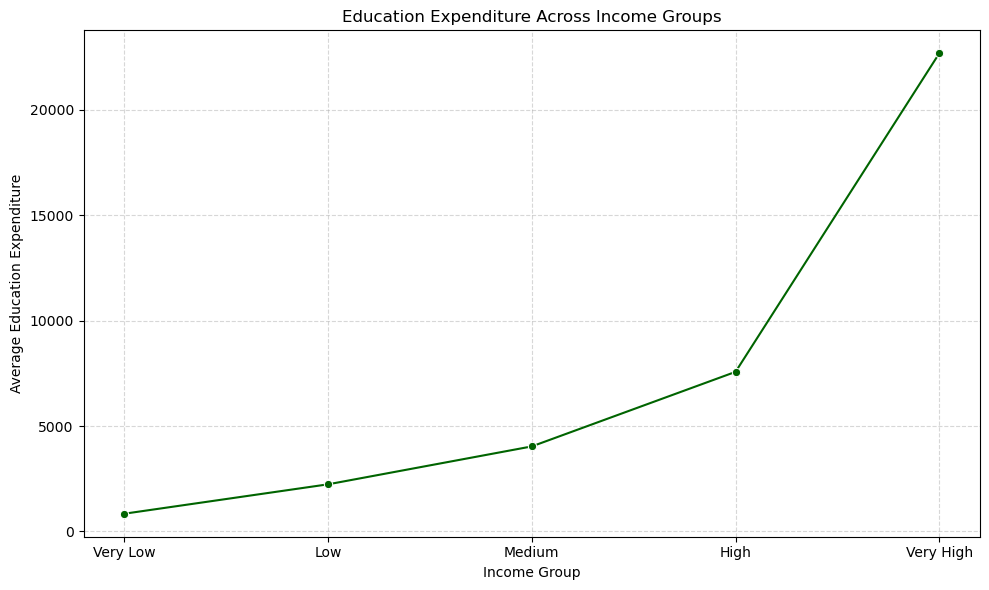

In [14]:
edu_by_income = family.groupby("Income Group")["Education Expenditure"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Income Group",
    y="Education Expenditure",
    data=edu_by_income,
    marker="o",
    color="darkgreen"
)
plt.title("Education Expenditure Across Income Groups")
plt.xlabel("Income Group")
plt.ylabel("Average Education Expenditure")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.12: </h1>
<h4> Education spending rises sharply with income. Higher-income families invest significantly more in education, reflecting greater access to private schooling or higher education, while lower-income families spend minimally on schooling. </h4>
<hr>

# #Electricity and Water Spending Across Regions
We analyze how utilities expenses differ regionally, uncovering patterns tied to income levels and inequality. Some urban regions show wider spending ranges, while others reflect more uniform and modest utility costs.

<h1> Question.13: </h1>
<h4>  What is the distribution of electricity and water spending across regions? </h4>

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=family,
    x="Region",
    y="Income Group",
    palette="pastel"
)
plt.title("Distribution of Total Income by Region")
plt.xlabel("Region")
plt.ylabel("Total Income")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x600 with 0 Axes>

<h1> Insight No.13: </h1>
<h4> The box plot reveals that regions such as the National Capital Region (NCR) and CALABARZON tend to have higher median incomes compared to other regions. However, these regions also show wider income ranges and more outliers, indicating higher income inequality. Meanwhile, regions like ARMM and CAR have more compact distributions and lower medians, reflecting generally lower and more consistent income levels. </h4>
<hr>

# #How Are Households Distributed by Income?
Looking at the income brackets, we see a fairly balanced spread with a tilt toward lower-income groups. The smallest slice belongs to the “Very High” income families, highlighting the economic inequality present in the country.

<h1> Question.14: </h1>
<h4>  What proportion of Filipino households fall into each income bracket? </h4>

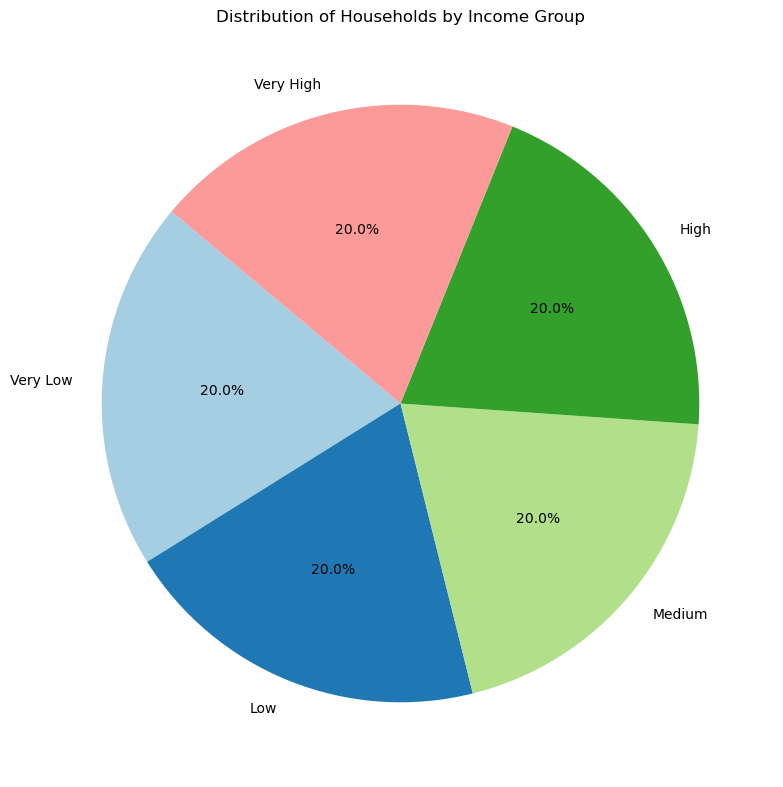

In [16]:
income_group_counts = family["Income Group"].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(
    income_group_counts,
    labels=income_group_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Paired"),
    startangle=140
)
plt.title("Distribution of Households by Income Group")
plt.tight_layout()
plt.show()

<h1> Insight No.14: </h1>
<h4>The income distribution is fairly balanced, but slightly skewed toward the lower brackets. The "Very High" income group is the smallest, reflecting economic inequality and the relative scarcity of wealthy households. </h4>
<hr>

# #Regions with the Highest Clothing Spending
By examining clothing expenses, we identify which regions allocate the most to apparel. Urban areas like NCR and Cordillera stand out, likely reflecting lifestyle preferences and market prices, while less urban regions tend to spend less.

<h1> Question.15: </h1>
<h4>  Which regions report the highest average clothing expenditures? </h4>

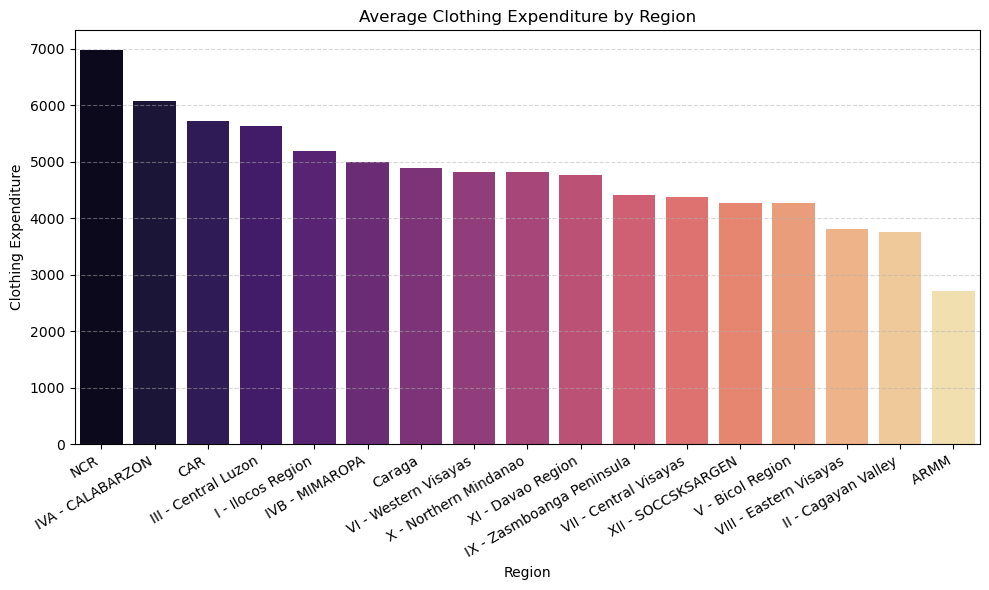

In [17]:
clothing_exp = family.groupby("Region")["Clothing, Footwear and Other Wear Expenditure"].mean().reset_index()
clothing_exp = clothing_exp.sort_values("Clothing, Footwear and Other Wear Expenditure", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Region",
    y="Clothing, Footwear and Other Wear Expenditure",
    data=clothing_exp,
    palette="magma"
)
plt.title("Average Clothing Expenditure by Region")
plt.xlabel("Region")
plt.ylabel("Clothing Expenditure")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.15: </h1>
<h4> Regions like NCR and Cordillera consistently lead in clothing expenditure, suggesting greater fashion demand or higher prices in urbanized areas. Less urban regions report lower average costs. </h4>
<hr>

# #Motorcycle and Tricycle Ownership by Region
We explore which regions have the most motorcycles and tricycles per household. Higher averages in places like ARMM and Eastern Visayas suggest a reliance on personal transport where public transit options are limited, while urban areas like NCR show lower ownership, likely due to better transit systems.

<h1> Question.16: </h1>
<h4>  Which regions have the highest average number of motorcycles/tricycles per household? </h4>

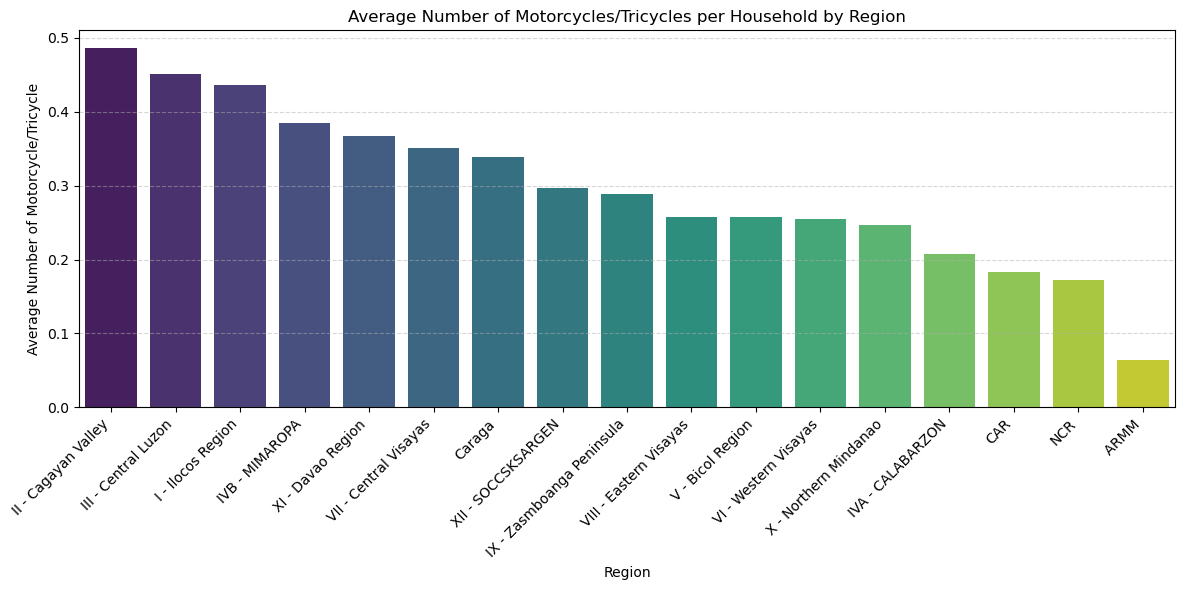

In [18]:
motorcycle_avg = family.groupby("Region")["Number of Motorcycle/Tricycle"].mean().reset_index()
motorcycle_avg = motorcycle_avg.sort_values(by="Number of Motorcycle/Tricycle", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=motorcycle_avg,
    x="Region",
    y="Number of Motorcycle/Tricycle",
    palette="viridis"
)
plt.title("Average Number of Motorcycles/Tricycles per Household by Region")
plt.xlabel("Region")
plt.ylabel("Average Number of Motorcycle/Tricycle")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<h1> Insight No.16: </h1>
<h4> Regions like ARMM and Eastern Visayas show higher average numbers of motorcycles or tricycles per household. This may indicate a greater dependence on personal transport due to limited public transportation options in these areas. Conversely, urbanized regions such as NCR have the lowest averages, likely due to better public transit infrastructure. </h4>
<hr>

# #Medical Spending Across Income Groups
We examine how healthcare expenses shift with income. While richer families tend to spend more on medical needs, significant variation among lower-income households points to unpredictable emergencies and unequal access to care.

<h1> Question.17: </h1>
<h4>  How does medical expenditure vary across income groups? </h4>

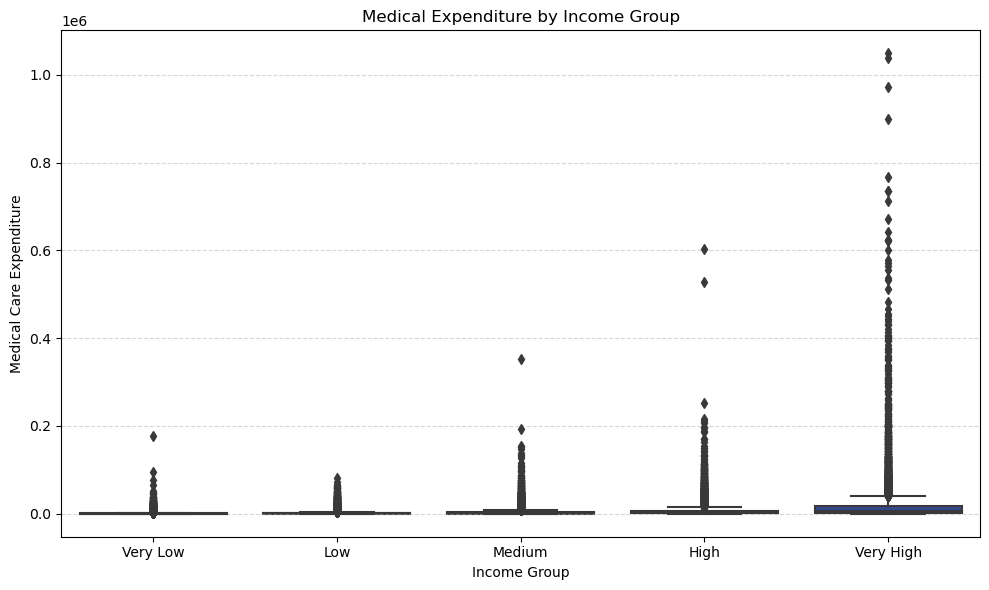

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Income Group",
    y="Medical Care Expenditure",
    data=family,
    palette="YlGnBu"
)
plt.title("Medical Expenditure by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Medical Care Expenditure")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.17: </h1>
<h4> Medical spending increases with income, but high variability exists even among the lowest income groups, possibly due to emergency spending or healthcare access disparities. </h4>
<hr>

# #Education Spending Across Regions
We compare average education expenses regionally, revealing Metro Manila’s lead—likely due to more private and advanced schooling options—while more remote areas spend less, highlighting gaps in educational access.

<h1> Question.18: </h1>
<h4> What are the average education expenditures across different regions? </h4>

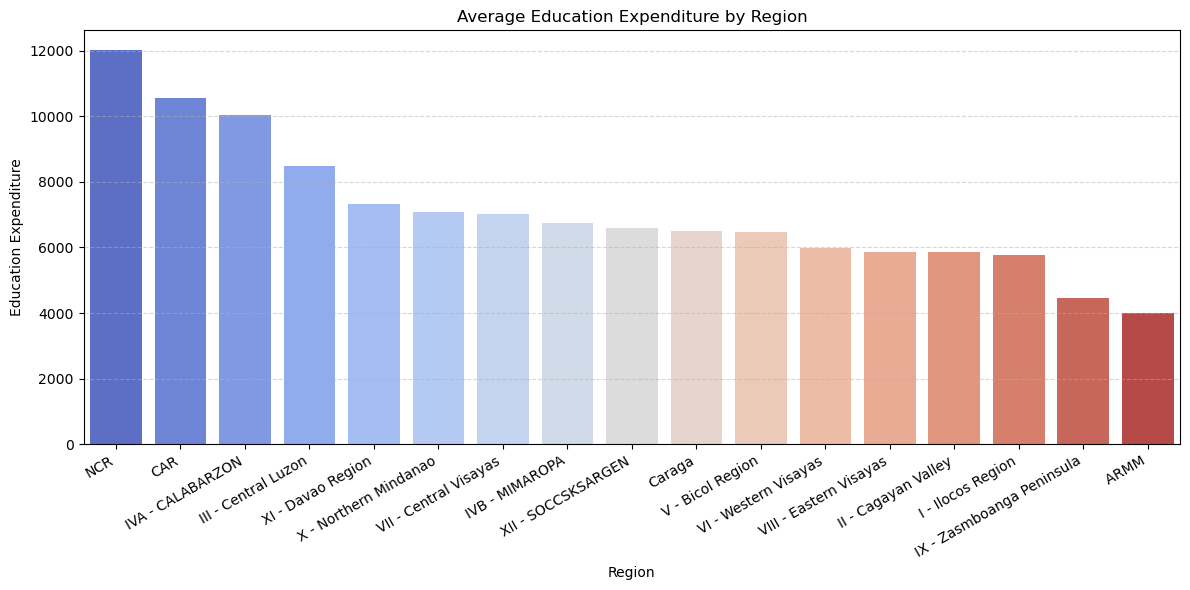

In [20]:
edu_exp = family.groupby("Region")["Education Expenditure"].mean().reset_index()
edu_exp = edu_exp.sort_values("Education Expenditure", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Education Expenditure",
    data=edu_exp,
    palette="coolwarm"
)
plt.title("Average Education Expenditure by Region")
plt.xlabel("Region")
plt.ylabel("Education Expenditure")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1> Insight No.18: </h1>
<h4> Metro Manila leads in education spending, reflecting greater access to private or advanced education institutions. Remote regions tend to spend less, hinting at educational resource gaps. </h4>
<hr>

# #How Is Household Income Distributed?
Looking at the overall income landscape, we find a right-skewed distribution. Most Filipino households earn on the lower end, while a smaller portion brings in much higher incomes—highlighting a clear gap in earnings.

<h1> Question.19: </h1>
<h4>What is the distribution of total household income across all households? </h4>

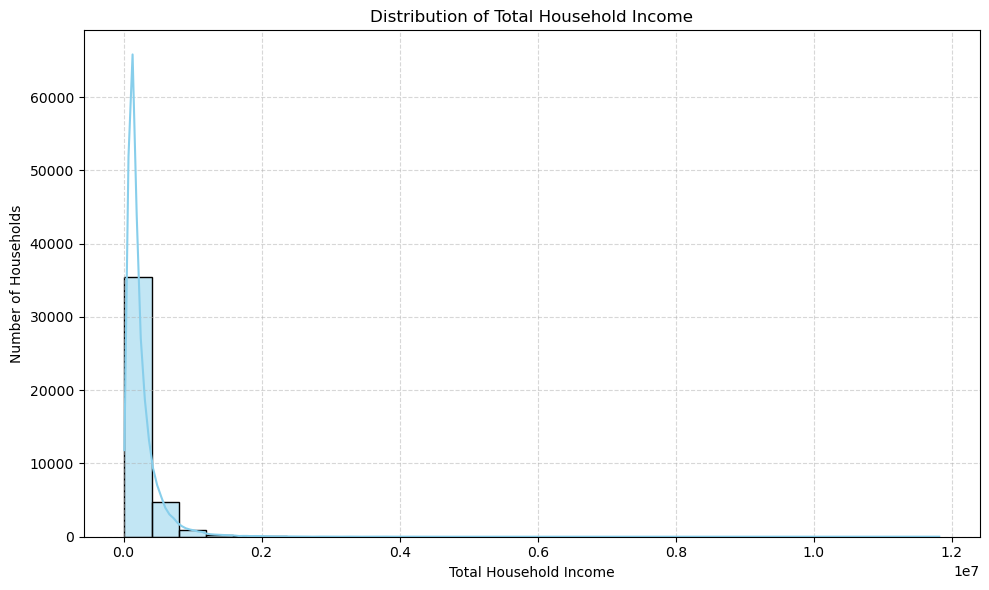

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(
    family["Total Household Income"],
    bins=30,
    kde=True,
    color="skyblue"
)
plt.title("Distribution of Total Household Income")
plt.xlabel("Total Household Income")
plt.ylabel("Number of Households")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<h1> Insight No.19: </h1>
<h4>The income distribution is right-skewed — most households fall into the lower income range, while a few earn significantly more, indicating income inequality. </h4>
<hr>

# #How Much Goes to Essentials?
We break down how much of the average household income is consumed by basic needs—food, housing, and transportation. These core expenses take up nearly half the budget, revealing how little is left for other priorities or comforts.

<h1> Question.20: </h1>
<h4>What portion of the average household income is spent on food, housing, and transportation? </h4>

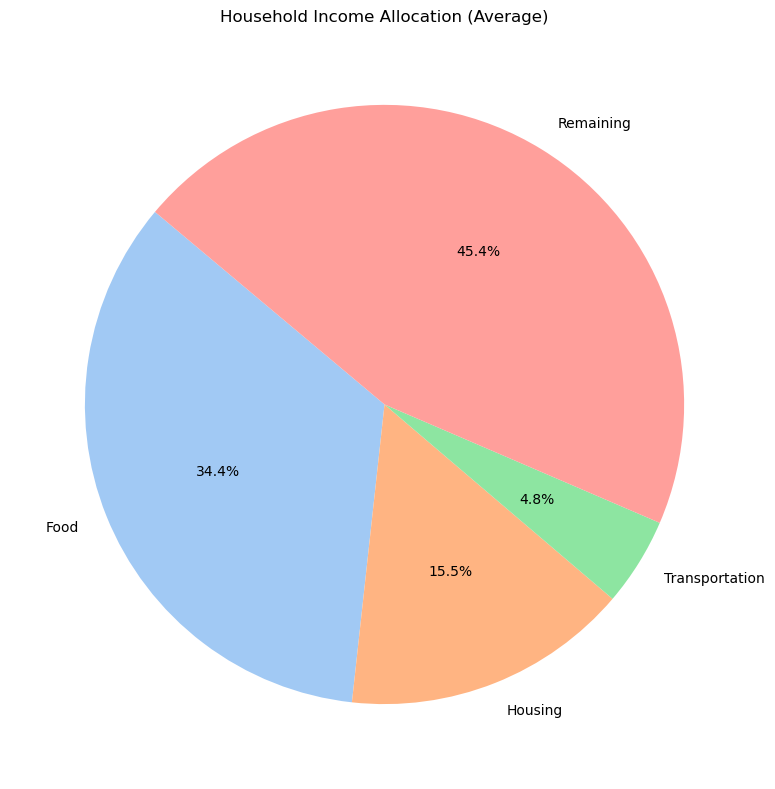

In [22]:
avg_food = family["Total Food Expenditure"].mean()
avg_housing = family["Housing and water Expenditure"].mean()
avg_transport = family["Transportation Expenditure"].mean()
avg_income = family["Total Household Income"].mean()

categories = ["Food", "Housing", "Transportation", "Remaining"]
values = [
    avg_food, 
    avg_housing, 
    avg_transport, 
    avg_income - (avg_food + avg_housing + avg_transport)
]

plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=categories,
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=140
)
plt.title("Household Income Allocation (Average)")
plt.tight_layout()
plt.show()


<h1> Insight No.20: </h1>
<h4> On average, nearly half of household income goes to essentials like food, housing, and transport. The remaining amount likely covers education, medical needs, and savings, leaving little room for luxuries. </h4>


##  Final Insights
Throughout this analysis, we observe that while income is a major driver of expenditure, it is not the only one. Cultural priorities, regional access, family size, and financial strategy all contribute to how households allocate resources. Understanding these dynamics is crucial for shaping effective public policy and financial education programs.


<h1>GENERAL CONCLUSION</h1>

<h4>The analysis of Filipino household income and expenditure patterns has unveiled crucial insights into the socio-economic dynamics that shape everyday life across the Philippines. From the basic necessity of food and rice to education, healthcare, and recreation, the data consistently show that income levels and regional disparities play a decisive role in shaping household priorities and spending capacity.

Higher-income households exhibit greater spending across most categories, but the analysis also highlights how lower-income families make strategic sacrifices and prioritize essentials despite limited means. Geographic differences—particularly between urbanized regions like NCR and more rural or underserved areas—reveal systemic inequalities in income distribution, healthcare access, educational investment, and even housing conditions.

Ultimately, the study underscores the importance of data-driven policymaking that addresses regional inequities and supports low- to middle-income households. It also reflects how understanding spending behavior can guide more targeted and inclusive economic interventions, helping uplift the quality of life across diverse Filipino communities. </h4>